In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('Chicago_Crime_Detective.csv')

C:\Users\SouravKumar\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (7,8) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.head()

,Unnamed: 0,ID,Date,LocationDescription,Arrest,Domestic,Beat,District,CommunityArea,Year
0,0,8951354,12/31/12 23:15,STREET,False,False,623,6,69,2012
1,1,8951141,12/31/12 22:00,STREET,False,False,1213,12,24,2012
2,2,8952745,12/31/12 22:00,RESIDENTIAL YARD (FRONT/BACK),False,False,1622,16,11,2012
3,3,8952223,12/31/12 22:00,STREET,False,False,724,7,67,2012
4,4,8951608,12/31/12 21:30,STREET,False,False,211,2,35,2012


In [4]:
df['Date']=pd.to_datetime(df.Date)
df.head()

,Unnamed: 0,ID,Date,LocationDescription,Arrest,Domestic,Beat,District,CommunityArea,Year
0,0,8951354,2012-12-31 23:15:00,STREET,False,False,623,6,69,2012
1,1,8951141,2012-12-31 22:00:00,STREET,False,False,1213,12,24,2012
2,2,8952745,2012-12-31 22:00:00,RESIDENTIAL YARD (FRONT/BACK),False,False,1622,16,11,2012
3,3,8952223,2012-12-31 22:00:00,STREET,False,False,724,7,67,2012
4,4,8951608,2012-12-31 21:30:00,STREET,False,False,211,2,35,2012


In [14]:
df.Date.sort_values(ascending=False)

0        2012-12-31 23:15:00
1        2012-12-31 22:00:00
2        2012-12-31 22:00:00
3        2012-12-31 22:00:00
4        2012-12-31 21:30:00
                 ...        
191634   2001-01-01 00:05:00
191638   2001-01-01 00:01:00
191639   2001-01-01 00:01:00
191637   2001-01-01 00:01:00
191640   2001-01-01 00:01:00
Name: Date, Length: 191641, dtype: datetime64[ns]

In [63]:
df['Month']=df.Date.dt.month
df.head()

,Unnamed: 0,ID,Date,LocationDescription,Arrest,Domestic,Beat,District,CommunityArea,Year,weekday,year,Month
0,0,8951354,2012-12-31 23:15:00,STREET,False,False,623,6,69,2012,0,2012,12
1,1,8951141,2012-12-31 22:00:00,STREET,False,False,1213,12,24,2012,0,2012,12
2,2,8952745,2012-12-31 22:00:00,RESIDENTIAL YARD (FRONT/BACK),False,False,1622,16,11,2012,0,2012,12
3,3,8952223,2012-12-31 22:00:00,STREET,False,False,724,7,67,2012,0,2012,12
4,4,8951608,2012-12-31 21:30:00,STREET,False,False,211,2,35,2012,0,2012,12


In [90]:
df['Arrest']=df.Arrest.astype(int)

In [41]:
df.Month.value_counts()

10    16977
7     16733
12    16417
1     16325
5     16298
8     16288
9     16009
3     15895
6     15894
11    15765
4     15086
2     13954
Name: Month, dtype: int64

In [43]:
df.drop(['Month'],axis=1,inplace=True)

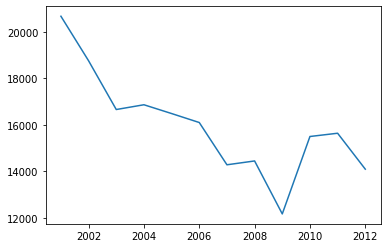

In [58]:
df['year']=df.Date.dt.year
df.head()
df.year.value_counts().sort_index().plot()

In [52]:
df.Date.dt.weekday.value_counts()

4    28545
5    27406
2    27387
0    27372
1    27141
3    27067
6    26723
Name: Date, dtype: int64

In [91]:
df.head(10)

,Unnamed: 0,ID,Date,LocationDescription,Arrest,Domestic,Beat,District,CommunityArea,Year,weekday,year,Month
0,0,8951354,2012-12-31 23:15:00,STREET,0,False,623,6,69,2012,0,2012,12
1,1,8951141,2012-12-31 22:00:00,STREET,0,False,1213,12,24,2012,0,2012,12
2,2,8952745,2012-12-31 22:00:00,RESIDENTIAL YARD (FRONT/BACK),0,False,1622,16,11,2012,0,2012,12
3,3,8952223,2012-12-31 22:00:00,STREET,0,False,724,7,67,2012,0,2012,12
4,4,8951608,2012-12-31 21:30:00,STREET,0,False,211,2,35,2012,0,2012,12
5,5,8950793,2012-12-31 20:30:00,STREET,1,False,2521,25,19,2012,0,2012,12
6,6,8950760,2012-12-31 20:10:00,STREET,0,False,423,4,48,2012,0,2012,12
7,7,8951611,2012-12-31 20:00:00,STREET,0,False,231,2,40,2012,0,2012,12
8,8,8951802,2012-12-31 19:00:00,STREET,1,False,1021,10,29,2012,0,2012,12
9,9,8950706,2012-12-31 18:00:00,STREET,0,False,1215,12,24,2012,0,2012,12


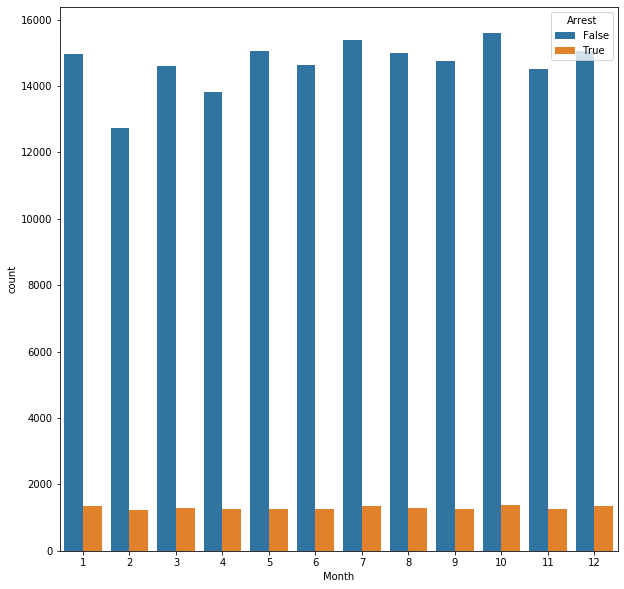

In [71]:
plt.figure(figsize=(10,10))
sns.countplot(x='Month',data=df,hue='Arrest')

In [100]:
df.Arrest.value_counts().sort_index()

0    176105
1     15536
Name: Arrest, dtype: int64

In [99]:
df.groupby('Year').Arrest.value_counts()

Year  Arrest
2001  0         18517
      1          2152
2002  0         16638
      1          2115
2003  0         14859
      1          1798
2004  0         15169
      1          1693
2005  0         14956
      1          1528
2006  0         14796
      1          1302
2007  0         13068
      1          1212
2008  0         13425
      1          1020
2009  0         11327
      1           840
2010  0         14796
      1           701
2011  0         15012
      1           625
2012  0         13542
      1           550
Name: Arrest, dtype: int64

In [126]:
df.groupby('Month').Arrest.value_counts()

Month  Arrest
1      0         14973
       1          1352
2      0         12726
       1          1228
3      0         14600
       1          1295
4      0         13818
       1          1268
5      0         15045
       1          1253
6      0         14646
       1          1248
7      0         15379
       1          1354
8      0         15001
       1          1287
9      0         14762
       1          1247
10     0         15596
       1          1381
11     0         14500
       1          1265
12     0         15059
       1          1358
Name: Arrest, dtype: int64

In [102]:
df.Year.value_counts()

2001    20669
2002    18753
2004    16862
2003    16657
2005    16484
2006    16098
2011    15637
2010    15497
2008    14445
2007    14280
2012    14092
2009    12167
Name: Year, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77]),
 <a list of 78 Text xticklabel objects>)

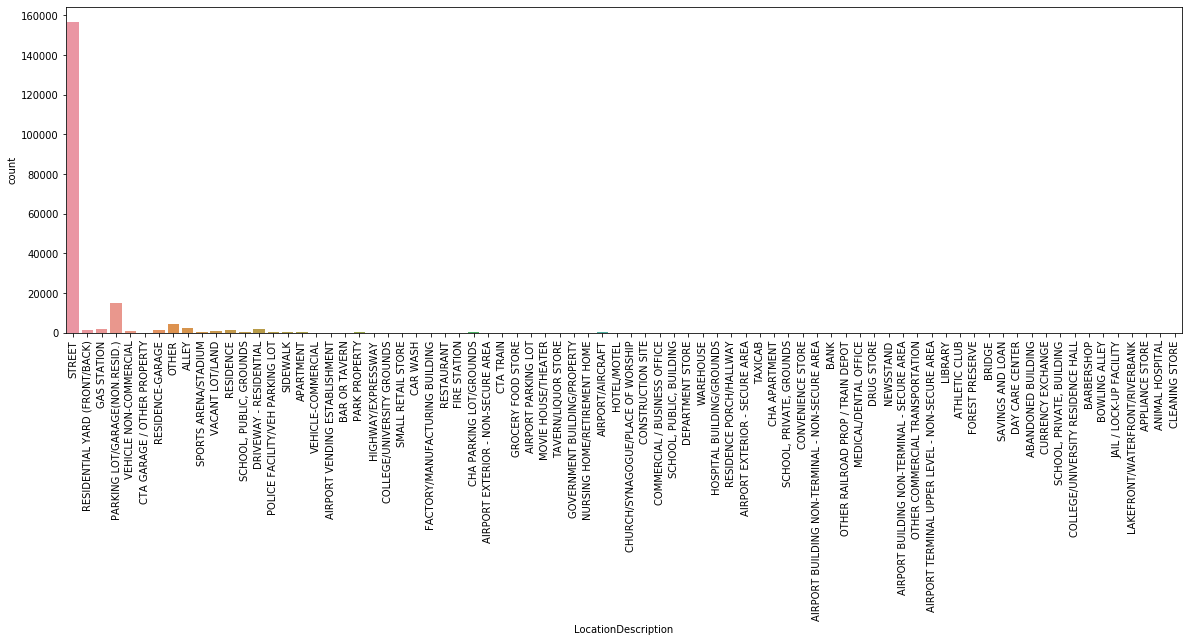

In [108]:
plt.figure(figsize=(20,6))
sns.countplot(x='LocationDescription',data=df)
plt.xticks(rotation=90)

In [110]:
df['weekday']=df.Date.dt.weekday

In [113]:
df.head()

,Unnamed: 0,ID,Date,LocationDescription,Arrest,Domestic,Beat,District,CommunityArea,Year,weekday,year,Month
0,0,8951354,2012-12-31 23:15:00,STREET,0,False,623,6,69,2012,0,2012,12
1,1,8951141,2012-12-31 22:00:00,STREET,0,False,1213,12,24,2012,0,2012,12
2,2,8952745,2012-12-31 22:00:00,RESIDENTIAL YARD (FRONT/BACK),0,False,1622,16,11,2012,0,2012,12
3,3,8952223,2012-12-31 22:00:00,STREET,0,False,724,7,67,2012,0,2012,12
4,4,8951608,2012-12-31 21:30:00,STREET,0,False,211,2,35,2012,0,2012,12


In [118]:
df.groupby('LocationDescription').weekday.value_counts()

LocationDescription                              weekday
ABANDONED BUILDING                               1          2
                                                 2          1
                                                 5          1
AIRPORT BUILDING NON-TERMINAL - NON-SECURE AREA  0          2
                                                 3          1
                                                           ..
WAREHOUSE                                        0          2
                                                 6          2
                                                 1          1
                                                 3          1
                                                 5          1
Name: weekday, Length: 418, dtype: int64

In [ ]:
plt.figure(figsize=(50,300))
sns.countplot(x='LocationDescription',data=df,hue='weekday')
plt.xticks(rotation=90)

In [121]:
df.weekday.value_counts()

4    28545
5    27406
2    27387
0    27372
1    27141
3    27067
6    26723
Name: weekday, dtype: int64

In [124]:
df.LocationDescription.value_counts()

STREET                                             156564
PARKING LOT/GARAGE(NON.RESID.)                      14852
OTHER                                                4573
ALLEY                                                2308
GAS STATION                                          2111
DRIVEWAY - RESIDENTIAL                               1675
RESIDENTIAL YARD (FRONT/BACK)                        1536
RESIDENCE                                            1302
RESIDENCE-GARAGE                                     1176
VACANT LOT/LAND                                       985
VEHICLE NON-COMMERCIAL                                817
SIDEWALK                                              462
CHA PARKING LOT/GROUNDS                               405
AIRPORT/AIRCRAFT                                      363
POLICE FACILITY/VEH PARKING LOT                       266
PARK PROPERTY                                         255
SCHOOL, PUBLIC, GROUNDS                               206
APARTMENT     

In [123]:
pd.set_option('display.max_rows',None)